# Python Reinforcement Learning Tutorial for Beginners in 25 Minutes
(https://www.youtube.com/watch?v=nRHjymV2PX8 )

We will be using stable-dependencies3 with PyTorch and Python 3.13 (use 3.11 for gpu processing), not stable-dependecies with Tensorflow-1.15 and Python 3.7 as stated in the video. 

Modified by:

Ashik Lal Krishna

21 April 2025

DysCo Lab, IIT Hyderabad

# 0. Install and Import Dependencies

1. Create a virtual enviorment 
"C:\Users\ashiklalkrishna\AppData\Local\Programs\Python\Python313\python.exe" -m venv C:\Users\ashiklalkrishna\pytorch_env
2. Activate it
C:\Users\ashiklalkrishna\tf1_env\Scripts\activate
3. pip install ipykernel
4. pip install stable-baselines3

5. Download swig from their site and extract it to C:\swigwin-4.3.1
6. Open your virtual enviornment and add swigwin to your PATH tempororily using >> set PATH=C:\swig-4.3.1;%PATH%
7. If pip give you any problem, reinstate pip PATH as well, using >>set PATH=%cd%\pytorch_env\Scripts;%PATH%
8.  pip install box2d
    pip install box2d-py
9. pip install pygame

# 1. Test Random Environment

Create an environment using OpenAI Gym: A lunar lander whose jets are controlled to land it between two flags on the lunar surface

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
gym.logger.MIN_LEVEL = 40 

environment_name = 'LunarLander-v3'
env = gym.make(environment_name, render_mode = 'human')

episodes = 10
episode_score =[]
try: 
    for episode in range(1, episodes+1):
        state = env.reset() 
        done = False
        score = 0 
        
        while not done:
            env.render()
            action = env.action_space.sample()  # take random steps to land it
            n_state, reward, done, info, _ = env.step(action)
            score += reward
        episode_score.append(score)

        print('Episode:{} Score:{}'.format(episode, score))
    
except KeyboardInterrupt:
    print("\n[INFO] Simulation interrupted by user")

finally:
    env.close()
    print(f"[INFO] Environment closed")

mean_score = np.mean(episode_score)
std_score = np.std(episode_score)
print(f"\nMean reward: {mean_score :.2f} ± {std_score:.2f}")


Episode:1 Score:-181.02348488301215
Episode:2 Score:-100.25019122293523
Episode:3 Score:-154.83216832088578
Episode:4 Score:-267.11628999656534
Episode:5 Score:-127.92163133225077
Episode:6 Score:-60.4465670138371
Episode:7 Score:-42.69470795315557
Episode:8 Score:-193.25528912673124
Episode:9 Score:-92.27444991131942
Episode:10 Score:-242.2343063384621
[INFO] Environment closed

Mean reward: -146.20 ± 71.25


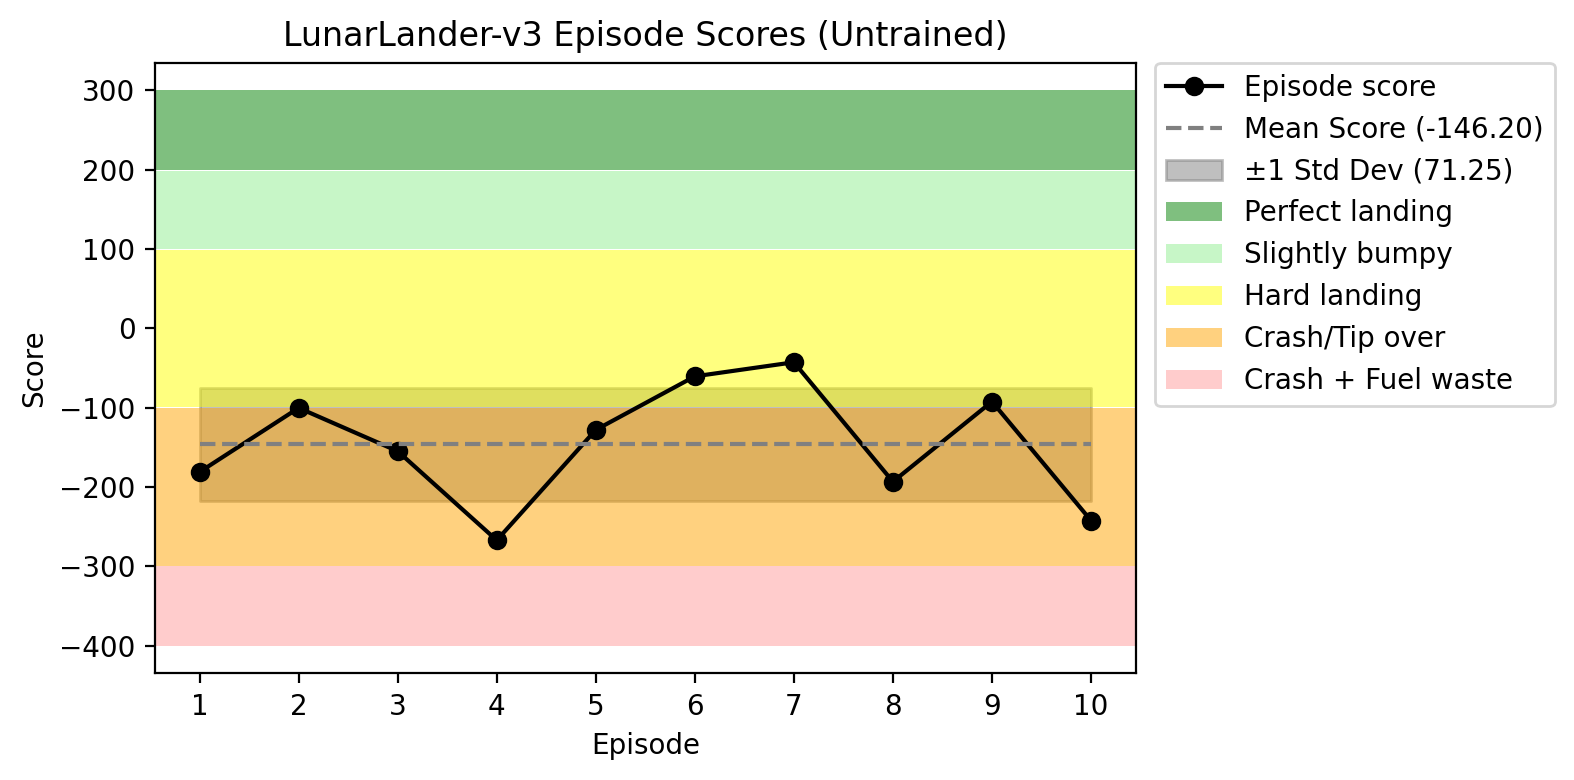

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)

x = range(1, len(episode_score) + 1)

# Episode scores
plt.plot(x, episode_score, marker='o', color = 'black', label='Episode score')

# Mean line
plt.plot(x, [mean_score]*len(x), color='gray', linestyle='--', label=f'Mean Score ({mean_score:.2f})')

# Standard deviation region
plt.fill_between(x, [mean_score - std_score]*len(x), [mean_score + std_score]*len(x),color='gray', alpha=0.5, label=f'±1 Std Dev ({std_score:.2f})'
)

#Score regions
plt.axhspan(200, 300, facecolor='green', alpha=0.5, label='Perfect landing')
plt.axhspan(100, 199, facecolor='lightgreen', alpha=0.5, label='Slightly bumpy')
plt.axhspan(99, -99, facecolor='yellow', alpha=0.5, label='Hard landing')
plt.axhspan(-100, -300, facecolor='orange', alpha=0.5, label='Crash/Tip over')
plt.axhspan(-400, -300, facecolor='red', alpha=0.2, label='Crash + Fuel waste')

plt.title("LunarLander-v3 Episode Scores (Untrained)")
plt.xlabel("Episode")
plt.xticks(np.arange(1,episode+1, 1))
plt.ylabel("Score")
#plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()


# 2. Build and Train the Model

1 million = 1.21 mins
5 million = 6. 55 mins
10 million = 19.45 mins

In [ ]:
import warnings
warnings.filterwarnings("ignore", message="To exit: use 'exit', 'quit', or Ctrl-D.")

import gymnasium as gym
gym.logger.MIN_LEVEL = 40 
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

environment_name = 'LunarLander-v3'
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])

model = PPO('MlpPolicy', env, verbose = 1, device = 'cuda')

Using cuda device


In [12]:
try:
    model.learn(total_timesteps=1_000_000)

except KeyboardInterrupt:
    print("\n[INFO] Training was interrupted")

-----------------------------
| time/              |      |
|    fps             | 347  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 288          |
|    iterations           | 2            |
|    time_elapsed         | 14           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0076569626 |
|    clip_fraction        | 0.0945       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.686       |
|    explained_variance   | -0.00907     |
|    learning_rate        | 0.0003       |
|    loss                 | 10.1         |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0152      |
|    value_loss           | 57.5         |
------------------------------------------
----------------

# Save (Delete) the model

In [ ]:
model.save("PPO_model_Lunar_2mn")

#del model

# Comparing GPU and CPU training time

In [ ]:
import sys
import warnings
warnings.filterwarnings("ignore", message="To exit: use 'exit', 'quit', or Ctrl-D.")

sys.exit()

import time

# Setup
environment_name = 'LunarLander-v3'
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])

# Function to train the model and return the time taken
def train_model(device, total_timesteps=00000):
    model = PPO('MlpPolicy', env, verbose=1, device=device)
    start_time = time.time()
    model.learn(total_timesteps=total_timesteps)
    end_time = time.time()
    return end_time - start_time

# Train on CPU
print("Training on CPU...")
cpu_time = train_model(device='cpu')
print(f"Time taken on CPU: {cpu_time:.2f} seconds")

# Train on GPU (if available)
print("Training on GPU...")
gpu_time = train_model(device='cuda')
print(f"Time taken on GPU: {gpu_time:.2f} seconds")

# Compare the results
print(f"Training on CPU was {cpu_time/gpu_time:.2f} times slower than on GPU.")


SystemExit: 

# 3. Test the Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym 
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO

env = gym.make(environment_name, render_mode='human')
env = DummyVecEnv([lambda: env])
model = PPO.load("PPO_model_Lunar_2mn", env=env)

# Evaluate the trained model
try:
    episode_rewards, episode_lengths = evaluate_policy(
        model,
        env,
        n_eval_episodes=10,
        return_episode_rewards=True
    )

except KeyboardInterrupt:
    print('\[INFO] Simulation Interrupted')

finally:
    env.close()
    print(f"[INFO] Environment closed")


[INFO] Environment closed


Episode 1: Reward = 168.68
Episode 2: Reward = 47.12
Episode 3: Reward = 191.71
Episode 4: Reward = 182.31
Episode 5: Reward = -85.26
Episode 6: Reward = 125.38
Episode 7: Reward = -44.23
Episode 8: Reward = 188.20
Episode 9: Reward = -84.67
Episode 10: Reward = 175.09

Mean reward: 86.43 ± 111.42


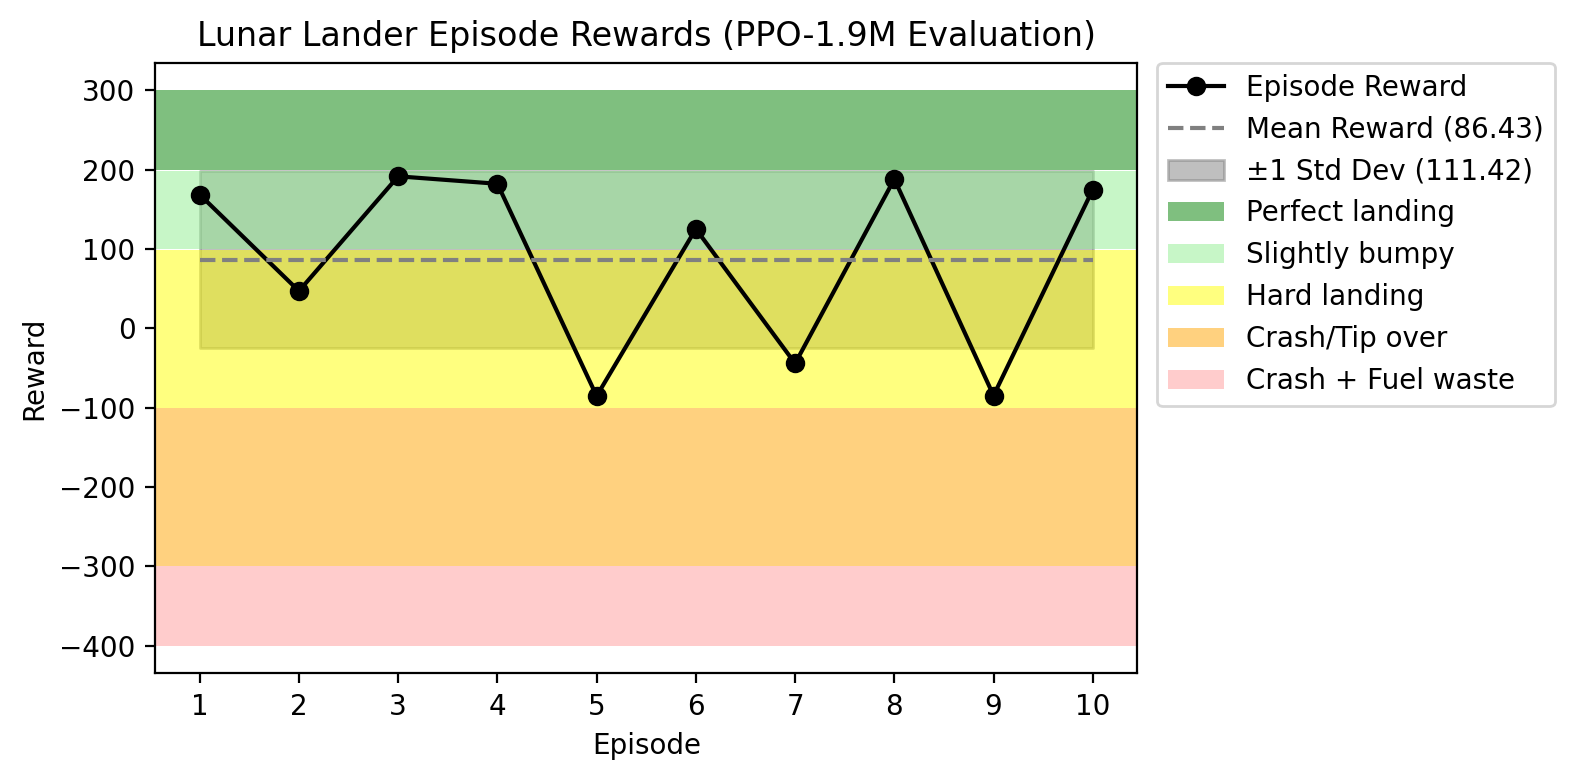

In [ ]:
for i, reward in enumerate(episode_rewards):
    print(f"Episode {i+1}: Reward = {reward:.2f}")

mean_reward = np.mean(episode_rewards)
std_reward = np.std(episode_rewards)
print(f"\nMean reward: {mean_reward:.2f} ± {std_reward:.2f}")

# Plot
plt.figure(figsize=(8, 4), dpi=200)
x = range(1, len(episode_rewards) + 1)

# Episode rewards
plt.plot(x, episode_rewards, marker='o', color='black', label='Episode Reward')

# Mean line
plt.plot(x, [mean_reward]*len(x), color='gray', linestyle='--', label=f'Mean Reward ({mean_reward:.2f})')

# Standard deviation region
plt.fill_between(x, [mean_reward - std_reward]*len(x), [mean_reward + std_reward]*len(x), color='gray', alpha=0.5, label=f'±1 Std Dev ({std_reward:.2f})')

# Score regions
plt.axhspan(200, 300, facecolor='green', alpha=0.5, label='Perfect landing')
plt.axhspan(100, 199, facecolor='lightgreen', alpha=0.5, label='Slightly bumpy')
plt.axhspan(-100, 99, facecolor='yellow', alpha=0.5, label='Hard landing')
plt.axhspan(-300, -100, facecolor='orange', alpha=0.5, label='Crash/Tip over')
plt.axhspan(-400, -300, facecolor='red', alpha=0.2, label='Crash + Fuel waste')

plt.title("Lunar Lander Episode Rewards (PPO-1.9M Evaluation)")
plt.xlabel("Episode")
plt.xticks(np.arange(1, len(episode_rewards) + 1, 1))
plt.ylabel("Reward")
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()

# Prediction

In [74]:
import warnings
warnings.filterwarnings("ignore", message="To exit: use 'exit', 'quit', or Ctrl-D.")
import gymnasium as gym
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO

environment_name = 'LunarLander-v3'
#environment_name = 'CartPole-v1'
env = gym.make(environment_name, render_mode='human')  # Make sure to use the correct environment name
env = DummyVecEnv([lambda: env])
model = PPO.load("PPO_model_Lunar_2mn", env=env)

# Reset the environment
obs = env.reset()  # This should return the initial observation and info

try:
    while True:
        action, _states = model.predict(obs)
        obs, rewards, done, info = env.step(action)
        
        # Rendering (if necessary)
        env.render()

        if done:
            break

except KeyboardInterrupt:
    print('\[INFO] Simulation Interrupted')

finally:
    env.close()
    print(f"[INFO] Environment closed")

[INFO] Environment closed
